In [6]:
import pandas as pd

ratings = pd.read_csv('ratings_small.csv')

ratings.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [9]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

# Define a Reader for parsing the rating scale (1–5)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

### Compute the average MAE and RMSE of the Probabilistic Matrix Factorization(PMF)
User based Collaborative Filtering, Item based Collaborative Filtering
Under the 5-folds cross-validation 

In [16]:
from surprise import KNNBasic

user_cf = KNNBasic(sim_options={'user_based': True})
results_user = cross_validate(user_cf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7468  0.7413  0.7443  0.7438  0.7457  0.7444  0.0019  
RMSE (testset)    0.9726  0.9636  0.9678  0.9680  0.9721  0.9688  0.0033  
Fit time          0.08    0.09    0.09    0.08    0.09    0.08    0.00    
Test time         0.54    0.59    0.53    0.50    0.62    0.55    0.04    


In [17]:

item_cf = KNNBasic(sim_options={'user_based': False})
results_item = cross_validate(item_cf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7214  0.7256  0.7236  0.7148  0.7187  0.7208  0.0038  
RMSE (testset)    0.9346  0.9410  0.9357  0.9288  0.9334  0.9347  0.0039  
Fit time          1.55    1.50    1.52    1.52    1.53    1.52    0.02    
Test time         2.13    2.19    2.15    2.18    2.22    2.17    0.03    


In [11]:
from surprise import SVD

pmf = SVD()
results_pmf = cross_validate(pmf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6928  0.6898  0.6902  0.6922  0.6940  0.6918  0.0016  
RMSE (testset)    0.8999  0.8921  0.8988  0.8979  0.9016  0.8981  0.0032  
Fit time          0.42    0.42    0.42    0.43    0.42    0.42    0.01    
Test time         0.05    0.10    0.05    0.05    0.05    0.06    0.02    


In [12]:
import numpy as np

print("User-based CF - MAE:", np.mean(results_user['test_mae']), "RMSE:", np.mean(results_user['test_rmse']))
print("Item-based CF - MAE:", np.mean(results_item['test_mae']), "RMSE:", np.mean(results_item['test_rmse']))
print("PMF (SVD) - MAE:", np.mean(results_pmf['test_mae']), "RMSE:", np.mean(results_pmf['test_rmse']))

User-based CF - MAE: 0.7442341047727561 RMSE: 0.9678511339593483
Item-based CF - MAE: 0.7214904309408139 RMSE: 0.9353448344429086
PMF (SVD) - MAE: 0.6918006316396572 RMSE: 0.8980717009461436



=== Evaluating USER-based CF ===
UserCF | sim=cosine  | k=5    ->  RMSE=1.0405  MAE=0.8030
UserCF | sim=cosine  | k=10   ->  RMSE=1.0097  MAE=0.7778
UserCF | sim=cosine  | k=20   ->  RMSE=0.9960  MAE=0.7685
UserCF | sim=msd     | k=5    ->  RMSE=0.9866  MAE=0.7555
UserCF | sim=msd     | k=10   ->  RMSE=0.9635  MAE=0.7374
UserCF | sim=msd     | k=20   ->  RMSE=0.9626  MAE=0.7384
UserCF | sim=pearson | k=5    ->  RMSE=1.0410  MAE=0.8094
UserCF | sim=pearson | k=10   ->  RMSE=1.0122  MAE=0.7852
UserCF | sim=pearson | k=20   ->  RMSE=0.9996  MAE=0.7748

=== Evaluating ITEM-based CF ===
ItemCF | sim=cosine  | k=5    ->  RMSE=1.1069  MAE=0.8647
ItemCF | sim=cosine  | k=10   ->  RMSE=1.0494  MAE=0.8200
ItemCF | sim=cosine  | k=20   ->  RMSE=1.0171  MAE=0.7935
ItemCF | sim=msd     | k=5    ->  RMSE=1.0218  MAE=0.7896
ItemCF | sim=msd     | k=10   ->  RMSE=0.9762  MAE=0.7557
ItemCF | sim=msd     | k=20   ->  RMSE=0.9465  MAE=0.7310
ItemCF | sim=pearson | k=5    ->  RMSE=1.0798  MAE=0.8407
Item

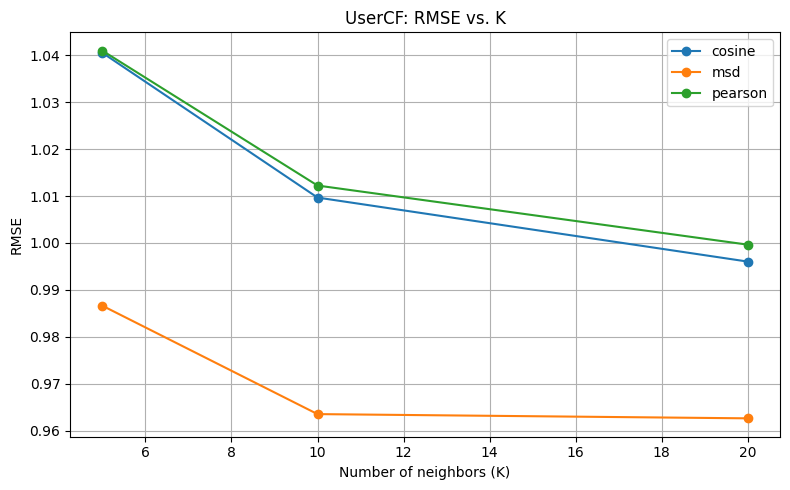

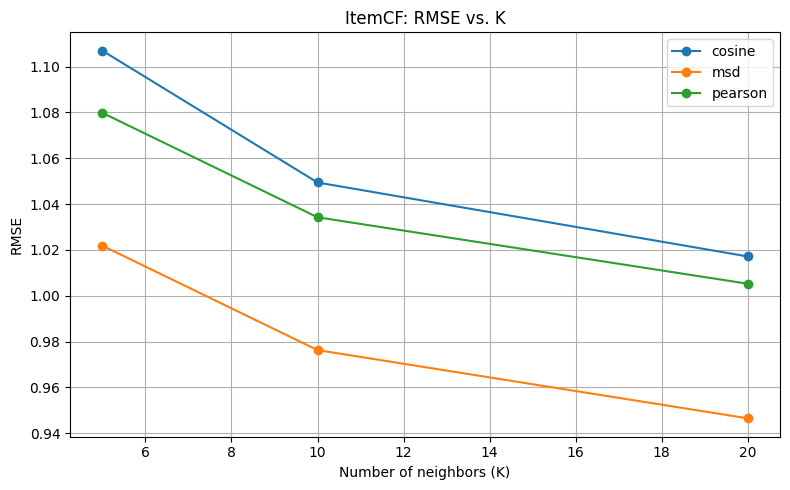

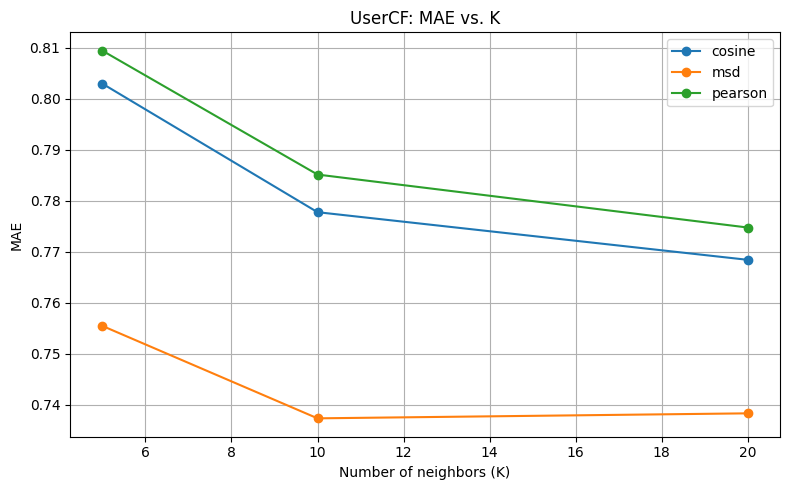

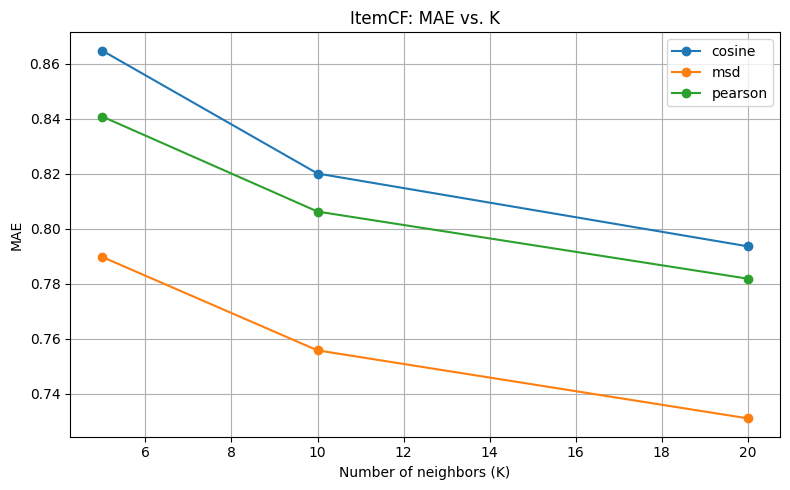


=== Best K by RMSE — User-based CF ===
algo_type similarity  best_k  best_rmse
   UserCF     cosine      20   0.996023
   UserCF        msd      20   0.962605
   UserCF    pearson      20   0.999634

=== Best K by RMSE — Item-based CF ===
algo_type similarity  best_k  best_rmse
   ItemCF     cosine      20   1.017108
   ItemCF        msd      20   0.946469
   ItemCF    pearson      20   1.005208

=== Overall winners (lowest RMSE) ===
UserCF : sim=msd | K=20 | RMSE=0.9626
ItemCF : sim=msd | K=20 | RMSE=0.9465

Is best K the same for UserCF and ItemCF? Yes


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# ---------- CONFIG ----------
RATINGS_CSV = "ratings_small.csv"   # path to ratings_small.csv
RATING_SCALE = (1, 5)
CV_FOLDS = 5
SEED = 42

# K values to try (tweak if you like)
K_GRID = [5, 10, 20]# 30, 40, 50, 75, 100

# Similarities to compare
SIMILARITIES = ["cosine", "msd", "pearson"]
# ----------------------------


def load_data(csv_path: str):
    df = pd.read_csv(csv_path)
    reader = Reader(rating_scale=RATING_SCALE)
    data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)
    return data


def evaluate_knn(data, user_based: bool, k_values, similarities, measures=("RMSE", "MAE"), cv=5, random_state=SEED):
    """
    For each similarity and K, run 5-fold CV with Surprise.KNNBasic and return a tidy DataFrame:
    columns = [algo_type, similarity, k, metric, score]
    """
    rows = []
    algo_label = "UserCF" if user_based else "ItemCF"

    for sim in similarities:
        for k in k_values:
            algo = KNNBasic(
                k=k,
                min_k=1,
                sim_options={"name": sim, "user_based": user_based},
                verbose=False,
                random_state=random_state,
            )
            cv_res = cross_validate(algo, data, measures=list(measures), cv=cv, n_jobs=1, verbose=False)
            for m in measures:
                mean_score = np.mean(cv_res[f"test_{m.lower()}"])
                rows.append(
                    {
                        "algo_type": algo_label,
                        "similarity": sim,
                        "k": k,
                        "metric": m,
                        "score": mean_score,
                    }
                )
            print(f"{algo_label} | sim={sim:<7} | k={k:<3d}  ->  RMSE={np.mean(cv_res['test_rmse']):.4f}  "
                  f"MAE={np.mean(cv_res['test_mae']):.4f}")

    return pd.DataFrame(rows)


def plot_metric_vs_k(df, algo_type, metric, title_suffix=""):
    """
    One chart per algorithm (UserCF/ItemCF) and metric (RMSE/MAE),
    lines for each similarity. Uses matplotlib only.
    """
    subset = df[(df["algo_type"] == algo_type) & (df["metric"] == metric)]
    # Simple loop plotting: one line per similarity
    plt.figure(figsize=(8, 5))
    for sim in SIMILARITIES:
        d = subset[subset["similarity"] == sim].sort_values("k")
        plt.plot(d["k"], d["score"], marker="o", label=sim)
    plt.xlabel("Number of neighbors (K)")
    plt.ylabel(metric)
    plt.title(f"{algo_type}: {metric} vs. K{title_suffix}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()


def best_k_by_rmse(df, algo_type):
    sub = df[(df["algo_type"] == algo_type) & (df["metric"] == "RMSE")]
    # best K per similarity
    out = []
    for sim in SIMILARITIES:
        d = sub[sub["similarity"] == sim]
        row = d.loc[d["score"].idxmin()]
        out.append(
            {"algo_type": algo_type, "similarity": sim, "best_k": int(row["k"]), "best_rmse": float(row["score"])}
        )
    return pd.DataFrame(out)


def main():
    data = load_data(RATINGS_CSV)

    print("\n=== Evaluating USER-based CF ===")
    user_df = evaluate_knn(
        data, user_based=True, k_values=K_GRID, similarities=SIMILARITIES, measures=("RMSE", "MAE"), cv=CV_FOLDS
    )

    print("\n=== Evaluating ITEM-based CF ===")
    item_df = evaluate_knn(
        data, user_based=False, k_values=K_GRID, similarities=SIMILARITIES, measures=("RMSE", "MAE"), cv=CV_FOLDS
    )

    results = pd.concat([user_df, item_df], ignore_index=True)

    # ---- Plots ----
    plot_metric_vs_k(results, "UserCF", "RMSE")
    plot_metric_vs_k(results, "ItemCF", "RMSE")
    plot_metric_vs_k(results, "UserCF", "MAE")
    plot_metric_vs_k(results, "ItemCF", "MAE")

    # Save figures (and also show)
    plt.savefig("cf_results_last_plot.png")  # last one; call savefig after each if you want all four files
    plt.show()

    # ---- Best K (by RMSE) tables ----
    user_best = best_k_by_rmse(results, "UserCF")
    item_best = best_k_by_rmse(results, "ItemCF")

    print("\n=== Best K by RMSE — User-based CF ===")
    print(user_best.to_string(index=False))

    print("\n=== Best K by RMSE — Item-based CF ===")
    print(item_best.to_string(index=False))

    # Overall winners for each algorithm (lowest RMSE among all sims & Ks)
    overall_user = user_best.loc[user_best["best_rmse"].idxmin()]
    overall_item = item_best.loc[item_best["best_rmse"].idxmin()]

    print("\n=== Overall winners (lowest RMSE) ===")
    print(f"UserCF : sim={overall_user['similarity']} | K={int(overall_user['best_k'])} | RMSE={overall_user['best_rmse']:.4f}")
    print(f"ItemCF : sim={overall_item['similarity']} | K={int(overall_item['best_k'])} | RMSE={overall_item['best_rmse']:.4f}")

    # Quick text answers for f/g:
    same_k = int(overall_user['best_k']) == int(overall_item['best_k'])
    print(f"\nIs best K the same for UserCF and ItemCF? {'Yes' if same_k else 'No'}")


if __name__ == "__main__":
    main()


In [18]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import cross_validate
import numpy as np
import pandas as pd

def find_best_k_cf_threshold(ratings_df, k_values=None, similarity='cosine', cv_folds=5, threshold=0.10):
    """
    Identify the best number of neighbors (K) for User-based and Item-based
    Collaborative Filtering based on RMSE improvement threshold (<10%).

    Parameters
    ----------
    ratings_df : pd.DataFrame
        Must contain ['userId', 'movieId', 'rating'].
    k_values : list of int
        List of K values to evaluate.
    similarity : str
        One of ['cosine', 'msd', 'pearson'].
    cv_folds : int
        Number of cross-validation folds.
    threshold : float
        Minimum relative improvement in RMSE (e.g. 0.10 for 10%).

    Returns
    -------
    dict
        Contains best K and RMSE for both UserCF and ItemCF.
    """
    if k_values is None:
        k_values = [5, 10, 20, 30, 40, 50, 75, 100]

    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

    results = {'UserCF': [], 'ItemCF': []}

    for user_based in [True, False]:
        cf_type = 'UserCF' if user_based else 'ItemCF'

        for k in k_values:
            algo = KNNBasic(
                k=k,
                min_k=1,
                sim_options={'name': similarity, 'user_based': user_based},
                verbose=False
            )
            cv_res = cross_validate(algo, data, measures=['RMSE'], cv=cv_folds, verbose=False)
            mean_rmse = np.mean(cv_res['test_rmse'])
            results[cf_type].append((k, mean_rmse))
            print(f"{cf_type} | sim={similarity:<7} | k={k:<3d} → RMSE={mean_rmse:.4f}")

    # Convert to DataFrames
    user_df = pd.DataFrame(results['UserCF'], columns=['K', 'RMSE'])
    item_df = pd.DataFrame(results['ItemCF'], columns=['K', 'RMSE'])

    def find_best_k_by_threshold(df):
        best_k = df.loc[df['RMSE'].idxmin(), 'K']
        prev_rmse = None
        for i in range(1, len(df)):
            prev_rmse = df.loc[i - 1, 'RMSE']
            curr_rmse = df.loc[i, 'RMSE']
            improvement = (prev_rmse - curr_rmse) / prev_rmse
            if improvement < threshold:
                return int(df.loc[i, 'K']), float(curr_rmse)
        return int(best_k), float(df['RMSE'].min())

    best_user_k, best_user_rmse = find_best_k_by_threshold(user_df)
    best_item_k, best_item_rmse = find_best_k_by_threshold(item_df)

    same_k = best_user_k == best_item_k

    print("\n=== Summary (Threshold-based) ===")
    print(f"UserCF best K: {best_user_k}, RMSE = {best_user_rmse:.4f}")
    print(f"ItemCF best K: {best_item_k}, RMSE = {best_item_rmse:.4f}")
    print(f"Same K for both? {'Yes' if same_k else 'No'}")

    return {
        'UserCF_best_K': best_user_k,
        'UserCF_best_RMSE': best_user_rmse,
        'ItemCF_best_K': best_item_k,
        'ItemCF_best_RMSE': best_item_rmse,
        'Same_K': same_k
    }


In [25]:
import pandas as pd

ratings = pd.read_csv("ratings_small.csv")

results = find_best_k_cf_threshold(
    ratings,
    k_values=[40, 50, 75, 100, 150],
    similarity='msd',
    threshold=0.001   # 1% improvement
)

print(results)


UserCF | sim=msd     | k=40  → RMSE=0.9686
UserCF | sim=msd     | k=50  → RMSE=0.9702
UserCF | sim=msd     | k=75  → RMSE=0.9733
UserCF | sim=msd     | k=100 → RMSE=0.9756
UserCF | sim=msd     | k=150 → RMSE=0.9775
ItemCF | sim=msd     | k=40  → RMSE=0.9344
ItemCF | sim=msd     | k=50  → RMSE=0.9334
ItemCF | sim=msd     | k=75  → RMSE=0.9322
ItemCF | sim=msd     | k=100 → RMSE=0.9324
ItemCF | sim=msd     | k=150 → RMSE=0.9339

=== Summary (Threshold-based) ===
UserCF best K: 50, RMSE = 0.9702
ItemCF best K: 100, RMSE = 0.9324
Same K for both? No
{'UserCF_best_K': 50, 'UserCF_best_RMSE': 0.9701941448555518, 'ItemCF_best_K': 100, 'ItemCF_best_RMSE': 0.9324100772271832, 'Same_K': False}
